# Plotando gráficos com matplotlib
Usando matplotlib para criar gráficos de barras que permitam visualizar as conclusões tiradas com groupby() e query().

In [13]:
# Vamos importar os pacotes necessários e carregar o arquivo `winequality_edited.csv`
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

df = pd.read_csv('winequality_edited.csv')
df.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


### 1: Será que vinhos com maior teor alcóolico recebem avaliações melhores?
Vamos criar um gráfico de barras com uma barra para amostras de vinho com baixo teor alcóolico e outra para amostras com alto teor alcóolico.

In [14]:
# Usando query para selecionar cada grupo e obter sua qualidade média
median = df['alcohol'].median()
low = df.query('alcohol < {}'.format(median))
high = df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

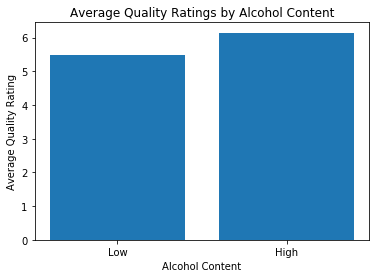

In [15]:
# Criando um gráfico de barras com rótulos adequados
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### 2: Vinhos mais suaves recebem avaliações melhores?
Criando um gráfico de barras com uma barra para amostras de vinho com baixo nível de açúcar residual e outra para amostras com alto nível de açúcar residual.

In [16]:
# Usando query para selecionar cada grupo e obter sua qualidade média
median = df['residual_sugar'].median()
low = df.query('residual_sugar < @median')
high = df.query('residual_sugar >= @median')

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

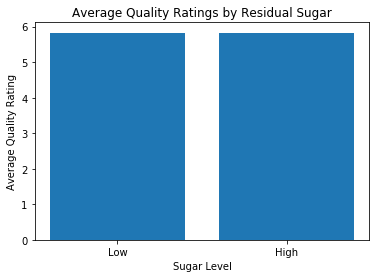

In [17]:
# Criando um gráfico de barras com rótulos adequados
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Residual Sugar')
plt.xlabel('Sugar Level')
plt.ylabel('Average Quality Rating');


### 3: Qual o nível de acidez que recebe a maior avaliação média?
Criando um gráfico de barras com uma barra para cada um dos quatro níveis de acidez.

In [18]:
# Usando groupby para obter a qualidade média para cada nível de acidez
df.groupby(['acidity_levels']).mean()['quality']

KeyError: 'acidity_levels'

In [ ]:
# Criando um gráfico de barras com rótulos adequados
df_mean = df.groupby(['acidity_levels']).mean()['quality']
df_mean.plot(kind='bar', ylim=(5.5, 6), title="Qualidade por niveis de Acidez", alpha=.60)
plt.xlabel('Niveis de Acidez', fontsize=15, color='red')
plt.ylabel('Average Quality Rating', fontsize=15, color='green');